<a href="https://colab.research.google.com/github/GreeshmaHarids/Greeshma_Meta_Scifor_Technology/blob/main/Python/Week_1_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Flipkart Mobiles Dataset
This dataset containing specs of various Mobile brands in India has been scraped from an ecommerce website 'Flipkart'. This dataset has 3114 samples with 8 attributes. There are some missing values as well.

Attributes-

**Brand**- Name of the Mobile Manufacturer

**Model**- Model number of the Mobile Phone

**Color**- Color of the model.

**Memory** - RAM of the model (4GB,6GB,8GB, etc.)

**Storage**- ROM of the model (32GB,64GB,128GB,256GB, etc.)

**Rating**- Rating of the model based on reviews (out of 5). Missing or Null values indicate there are no ratings present for the model.

**Selling Price**- Selling Price/Discounted Price of the model in INR when this data was scraped. Ideally price indicates the discounted price of the model

**Original Price**- Actual price of the model in INR. Missing values or null values would indicate that the product is being sold at the actual price available in the 'Price' column.

In [205]:
df=pd.read_csv('/content/Flipkart_Mobiles.csv')
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [206]:
df.tail(5)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [207]:
df.shape

(3114, 8)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [209]:
df.isna().sum()

,0
Brand,0
Model,0
Color,0
Memory,43
Storage,39
Rating,144
Selling Price,0
Original Price,0


In [210]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage


,0
Memory,1.380861
Storage,1.252408
Rating,4.624277


Since the missing or null values in the Rating column indicate that there are no ratings present for the model, and the percentage of null values in Memory and Storage column are very low dropping the rows with missing values in these columns.

In [211]:
df.dropna(inplace=True)
df.isna().sum()

,0
Brand,0
Model,0
Color,0
Memory,0
Storage,0
Rating,0
Selling Price,0
Original Price,0


### Visualization

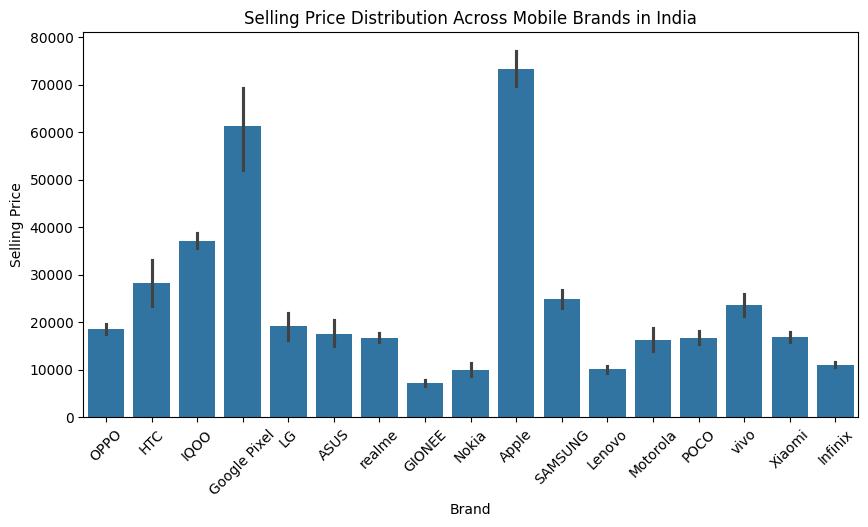

In [212]:
#Selling Price Distribution Across Mobile Brands in India
plt.figure(figsize=(10,5))
sns.barplot(x='Brand', y='Selling Price', data=df)
plt.xticks(rotation=45)
plt.title("Selling Price Distribution Across Mobile Brands in India")
plt.show()



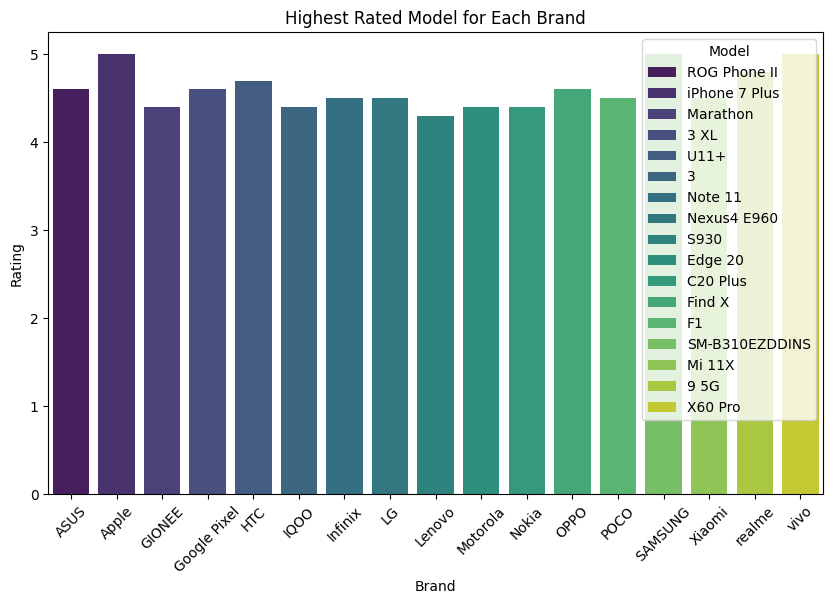

In [213]:
#Bar-plot for highest rated models for each brand
top_models = df.loc[df.groupby('Brand')['Rating'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Rating', hue='Model', data=top_models, palette='viridis')
plt.title('Highest Rated Model for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


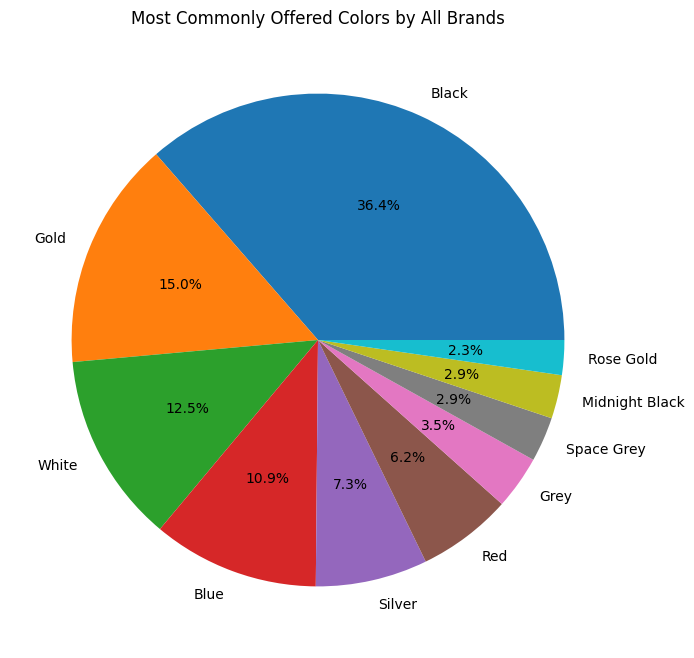

In [214]:
#Pie chart for showing most commomnly offered colors

color_counts = df['Color'].value_counts()
color_counts=color_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%')

plt.title('Most Commonly Offered Colors by All Brands')
plt.show()


### **Explain the Use of pandas, numpy, seaborn, and matplotlib**


Pandas:Python package for data manipulation and analysis

Use: data cleaning and preprocessing to data exploration, manipulation, and preparation for machine learning.

In [215]:
#Eg

#1)load data from various file formats into pandas DataFrames

import pandas as pd
data=pd.read_csv('/content/Flipkart_Mobiles.csv')
data.head(2)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990


NumPy: a fundamental package for numerical computing in Python.

It provides support for arrays, matrices, and many mathematical functions to operate on these data structures efficiently.


In [216]:
import numpy as np

#printing mean of a column

df['Original Price'].mean()


26656.677942699345

Matplotlib: a plotting library for Python that allows you to create visualizations.

useful for creating line plots, scatter plots, bar charts, histograms, and more.

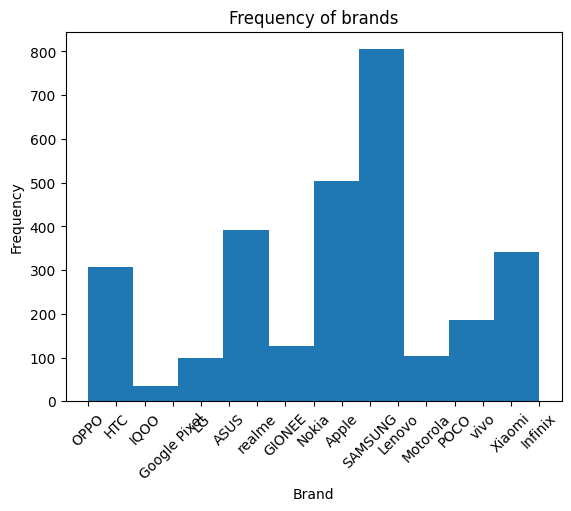

In [217]:
import matplotlib.pyplot as plt
plt.hist(df['Brand'])
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Frequency of brands')
plt.xticks(rotation=45)
plt.show()

Seaborn:built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

It simplifies the process of creating complex visualizations and offers built-in themes and color palettes.

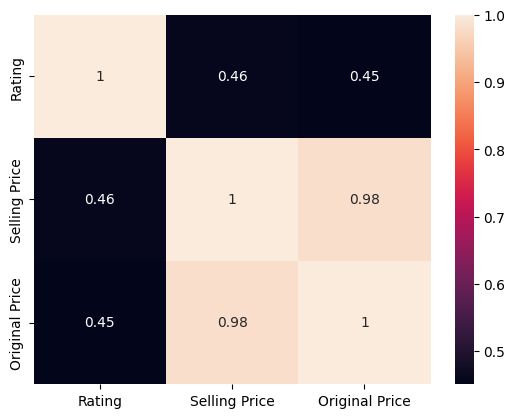

In [219]:
import seaborn as sns

data=df.select_dtypes(include=np.number)
sns.heatmap(data.corr(),annot=True)
plt.show()
